In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. 파일 불러오기
sal_data_final = pd.read_csv('통합_연봉데이터.csv')
sal_data_final

,선수,연봉(만원),WAR,WAR당 연봉,팀,pid,연봉,팀연봉순위,전체연봉순위,연도
0,채은성,180000.0,2.36,76221,한화 이글스,11215,180000.0,3.0,12.0,2023
1,최재훈,80000.0,3.90,20492,한화 이글스,10170,80000.0,9.0,94.0,2023
2,스미스,70000.0,0.09,756875,한화 이글스,15540,70000.0,10.0,113.0,2023
3,오그레디,70000.0,-0.87,-80365,한화 이글스,15541,70000.0,11.0,114.0,2023
4,이태양,66000.0,1.44,45702,한화 이글스,10609,66000.0,12.0,128.0,2023
...,...,...,...,...,...,...,...,...,...,...
2529,송지후,3000.0,-0.34,-8727,키움 히어로즈,16130,3000.0,243.0,2527.0,2025
2530,김주훈,3000.0,0.00,-,키움 히어로즈,16129,3000.0,244.0,2528.0,2025
2531,서유신,3000.0,-0.24,-12551,키움 히어로즈,15483,3000.0,245.0,2529.0,2025
2532,박성빈,3000.0,0.00,-,키움 히어로즈,15479,3000.0,246.0,2530.0,2025


### 팀별 연봉 분포 시각화

In [4]:
# 팀별 연봉 통계
team_salary_summary = sal_data_final.groupby('팀')['연봉(만원)'].agg(
    count='count',
    max='max',
    mean='mean',
    median='median',
    min='min'
).reset_index()

# 보기 좋게 평균 연봉 기준 정렬
team_salary_summary = team_salary_summary.sort_values('mean', ascending=False)

# 결과 확인
display(team_salary_summary)

,팀,count,max,mean,median,min
4,SSG 랜더스,241,300000.0,18270.124481,3200.0,3000.0
6,롯데 자이언츠,243,150000.0,15395.144033,4000.0,1500.0
7,삼성 라이온즈,260,200000.0,15264.230769,4600.0,3000.0
1,KT 위즈,269,210000.0,14739.405204,3500.0,3000.0
2,LG 트윈스,246,250000.0,14725.203252,3800.0,1600.0
9,한화 이글스,256,250000.0,14071.484375,3600.0,3000.0
0,KIA 타이거즈,254,168000.0,13405.511811,4000.0,3000.0
5,두산 베어스,259,160000.0,13142.316602,3500.0,3000.0
3,NC 다이노스,258,168000.0,11792.635659,3400.0,3000.0
8,키움 히어로즈,248,140000.0,11621.370968,4000.0,1500.0


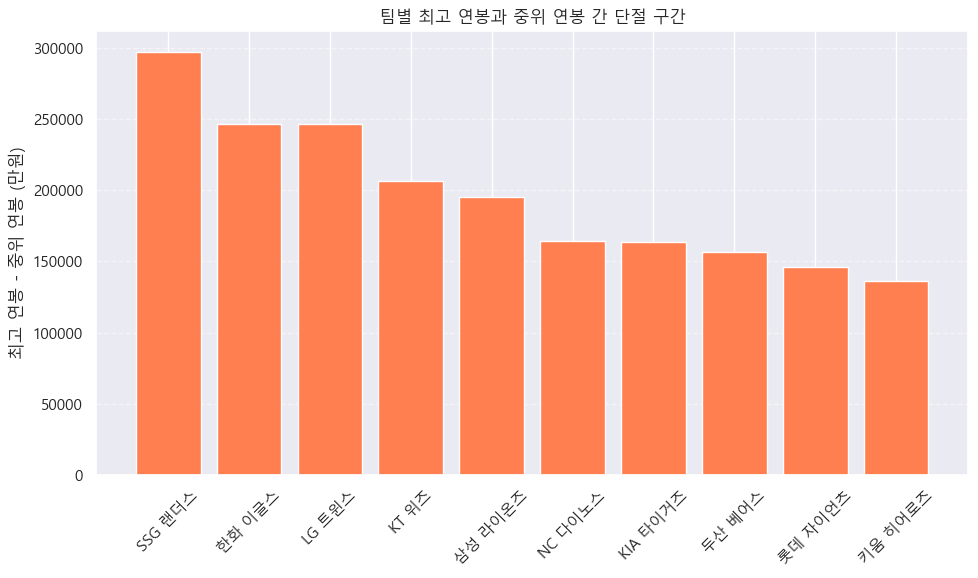

In [5]:
# 1. 단절 구간 지표 생성
team_salary_summary['max_minus_median'] = team_salary_summary['max'] - team_salary_summary['median']

# 2. 막대그래프용 정렬
team_salary_summary = team_salary_summary.sort_values('max_minus_median', ascending=False)

# 3. 시각화
plt.figure(figsize=(10, 6))
plt.bar(team_salary_summary['팀'], team_salary_summary['max_minus_median'], color='coral')
plt.xticks(rotation=45)
plt.ylabel('최고 연봉 - 중위 연봉 (만원)')
plt.title('팀별 최고 연봉과 중위 연봉 간 단절 구간')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [6]:
# SSG 선수만 추출
ssg_df = sal_data_final[sal_data_final['팀'] == 'SSG 랜더스'].copy()

# 연봉 내림차순 정렬
ssg_df = ssg_df.sort_values('연봉(만원)', ascending=False).reset_index(drop=True)

# 바로 아래 선수와의 연봉 차이 계산
ssg_df['연봉차이'] = ssg_df['연봉(만원)'].diff(-1).fillna(0)

# 몇 번째 선수인지 보기 좋게 인덱스 추가
ssg_df['순위'] = ssg_df.index + 1

# 연봉 차이가 큰 순서로 정렬해서 단절구간 파악
ssg_df.sort_values('연봉차이', ascending=False).head(10)

,선수,연봉(만원),WAR,WAR당 연봉,팀,pid,연봉,팀연봉순위,전체연봉순위,연도,연봉차이,순위
0,김광현,300000.0,2.18,137692,SSG 랜더스,10126,300000.0,1.0,1.0,2025,76000.0,1
1,에레디아,224000.0,1.22,184174,SSG 랜더스,15530,224000.0,2.0,4.0,2025,54000.0,2
5,화이트,140000.0,3.30,42485,SSG 랜더스,16324,140000.0,6.0,25.0,2025,25000.0,6
4,앤더슨,161000.0,4.51,35687,SSG 랜더스,16146,161000.0,5.0,18.0,2025,21000.0,5
12,김광현,100000.0,4.48,22341,SSG 랜더스,10126,100000.0,11.0,60.0,2023,10000.0,13
8,박종훈,110000.0,-0.04,-2869987,SSG 랜더스,10131,110000.0,9.0,51.0,2025,10000.0,9
17,로메로,80000.0,0.00,-,SSG 랜더스,15529,80000.0,17.0,97.0,2023,10000.0,18
15,에레디아,90000.0,4.11,21918,SSG 랜더스,15530,90000.0,14.0,80.0,2023,10000.0,16
3,최정,170000.0,0.24,723057,SSG 랜더스,10106,170000.0,4.0,14.0,2025,9000.0,4
27,서진용,45000.0,-0.12,-374931,SSG 랜더스,10784,45000.0,28.0,224.0,2024,5000.0,28


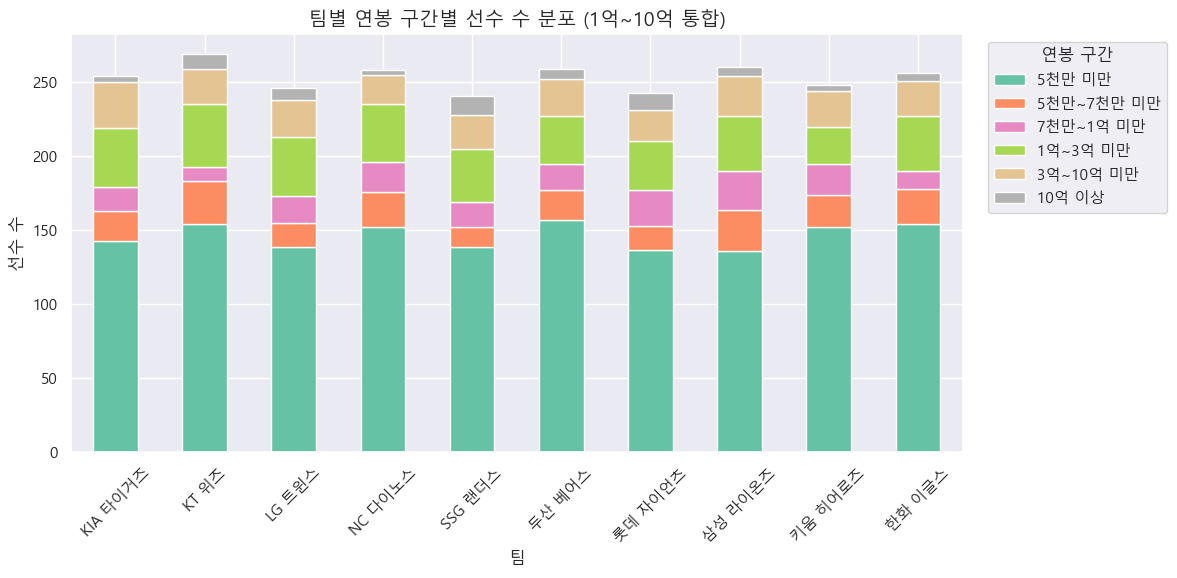

In [49]:
# 1. 구간 재정의 (6구간)
bins = [0, 5000, 7000, 10000, 30000, 100000, float('inf')]
labels = [
    '5천만 미만', '5천만~7천만 미만', '7천만~1억 미만',
    '1억~3억 미만', '3억~10억 미만', '10억 이상'
]

# 2. 구간 적용
sal_data_final['연봉구간'] = pd.cut(sal_data_final['연봉(만원)'], bins=bins, labels=labels, right=False)

# 3. 팀별 집계
team_bin_df = sal_data_final.groupby(['팀', '연봉구간']).size().unstack(fill_value=0)

# 4. 시각화
team_bin_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('팀별 연봉 구간별 선수 수 분포 (1억~10억 통합)', fontsize=14)
plt.xlabel('팀')
plt.ylabel('선수 수')
plt.xticks(rotation=45)
plt.legend(title='연봉 구간', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

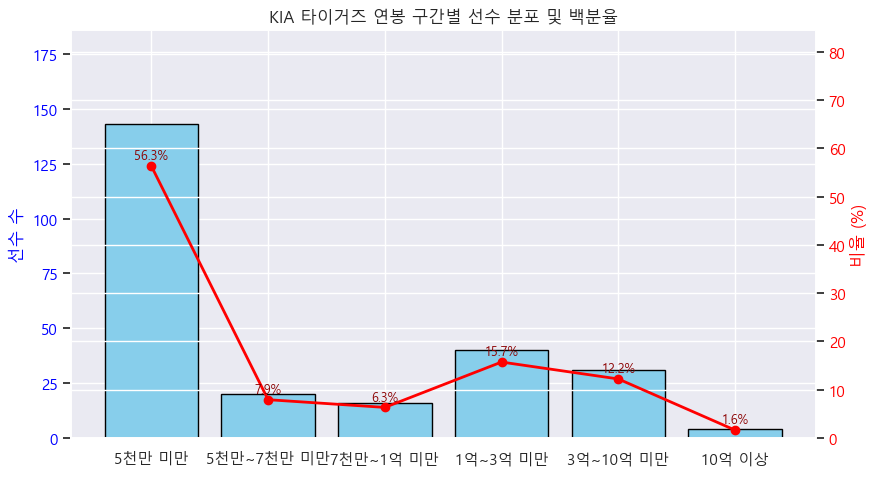

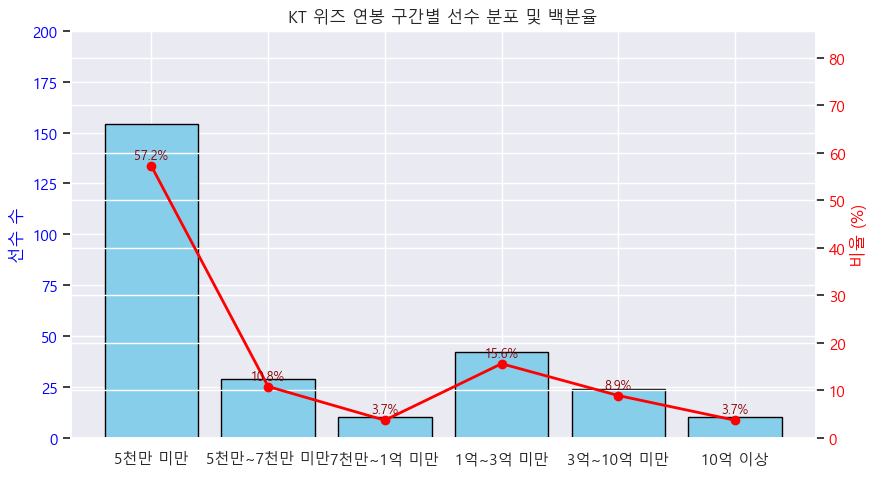

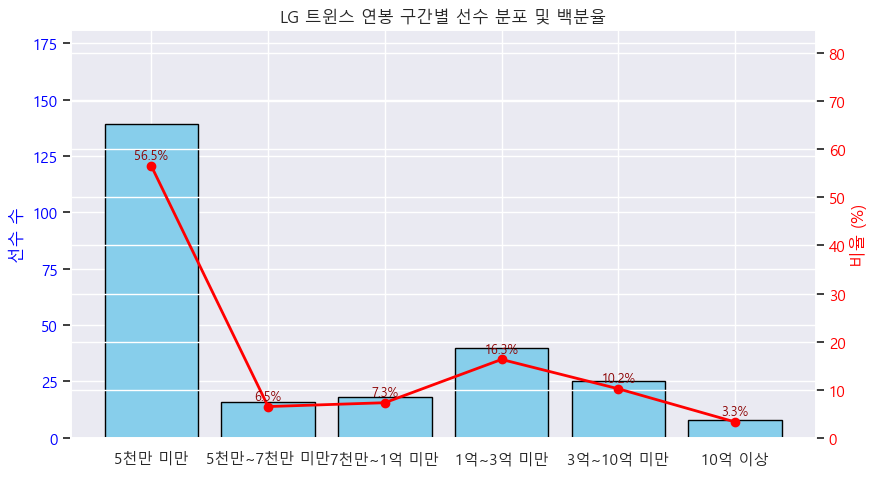

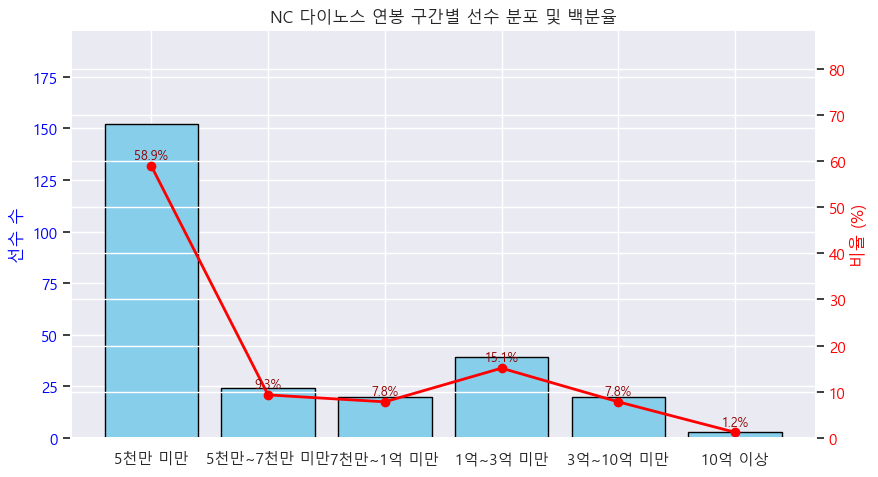

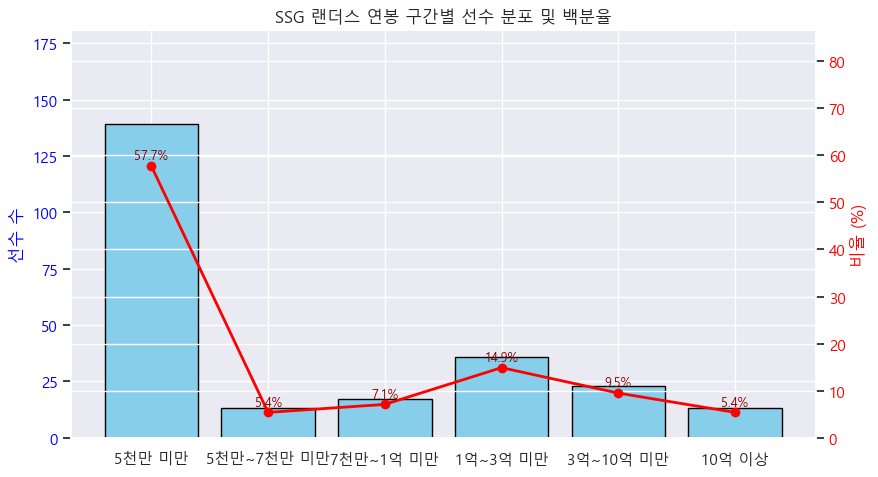

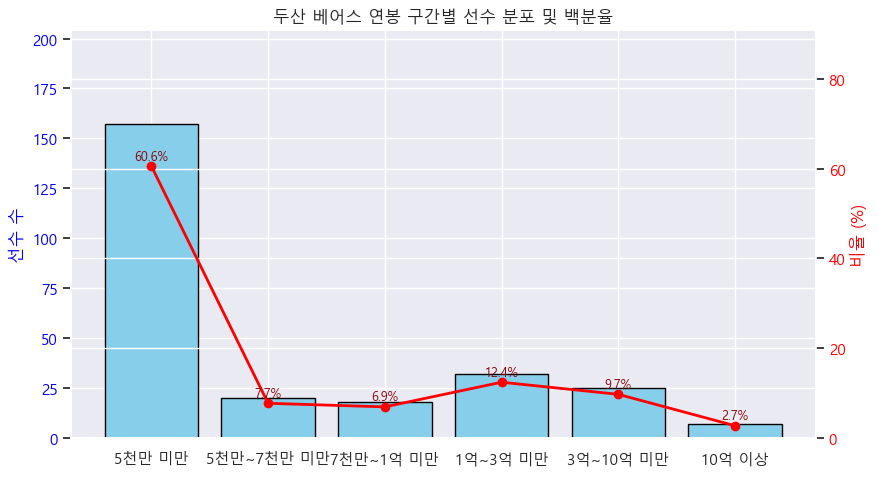

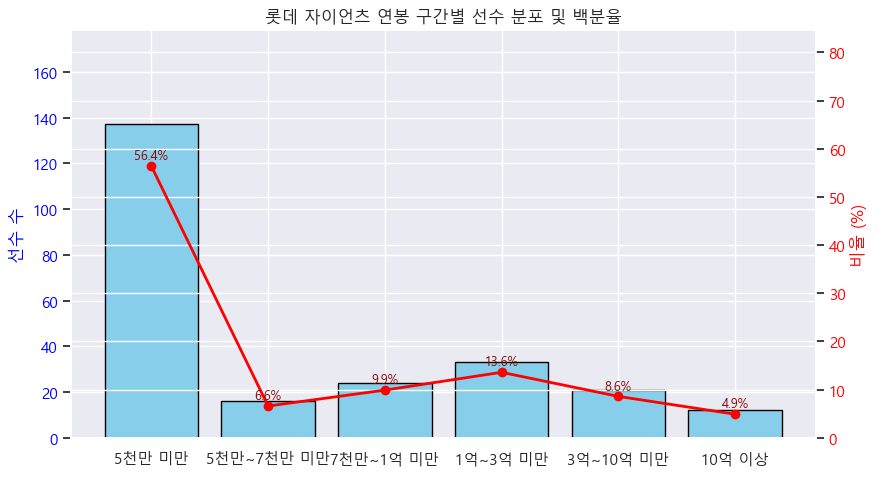

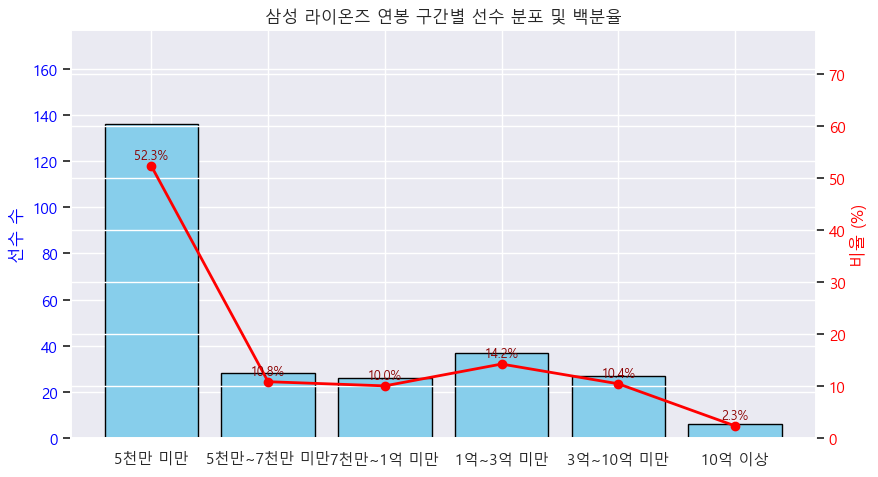

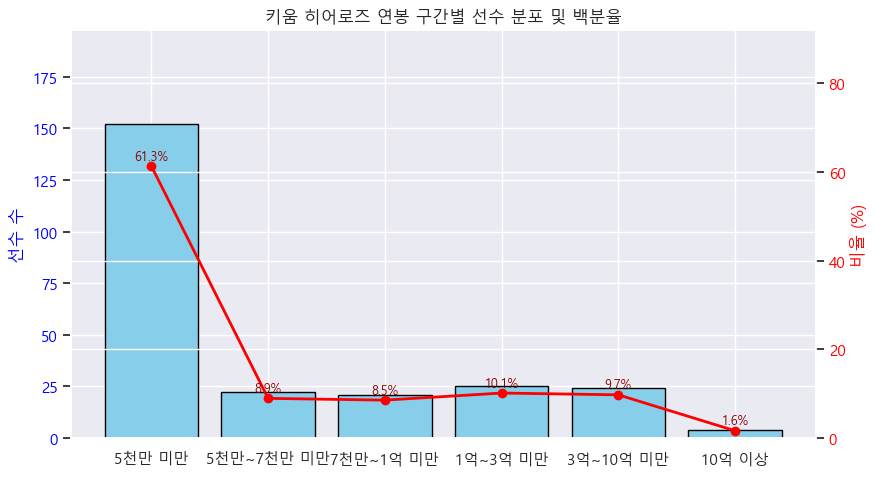

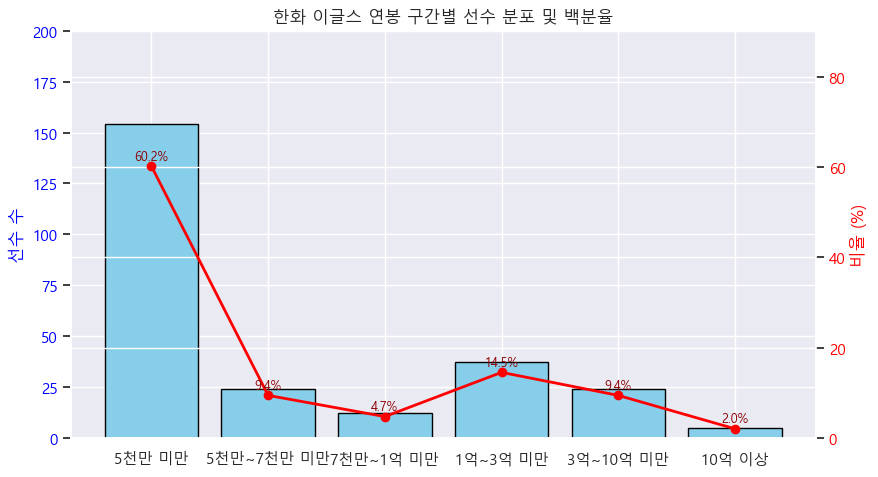

In [59]:
# 1. 연봉 구간 정의 (줄바꿈 추가된 라벨)
bins = [0, 5000, 7000, 10000, 30000, 100000, float('inf')]
labels = [
    '5천만 미만', '5천만~7천만 미만', '7천만~1억 미만',
    '1억~3억 미만', '3억~10억 미만', '10억 이상'
]

# 2. 연봉 구간 적용
sal_data_final['연봉구간'] = pd.cut(sal_data_final['연봉(만원)'], bins=bins, labels=labels, right=False)

# 3. 팀 목록
teams = sorted(sal_data_final['팀'].unique())

# 4. 팀별 그래프 반복 생성
for team in teams:
    df_team = sal_data_final[sal_data_final['팀'] == team]
    
    # 구간별 선수 수와 비율 계산
    counts = df_team['연봉구간'].value_counts().sort_index()
    percents = (counts / counts.sum() * 100).round(1)

    # 그래프 생성
    fig, ax1 = plt.subplots(figsize=(9, 5))

    # 막대그래프 (선수 수)
    bars = ax1.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
    ax1.set_ylabel('선수 수', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_ylim(0, max(counts.values) * 1.3)

    # 선그래프 (백분율)
    ax2 = ax1.twinx()
    ax2.plot(counts.index, percents.values, color='red', marker='o', linewidth=2)
    ax2.set_ylabel('비율 (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, max(percents.values) * 1.5)

    # 퍼센트 수치 라벨 추가
    for i, (x, y) in enumerate(zip(counts.index, percents.values)):
        ax2.text(i, y + 0.8, f'{y}%', ha='center', va='bottom', color='darkred', fontsize=9)

    # 제목, x축 라벨 설정
    plt.title(f'{team} 연봉 구간별 선수 분포 및 백분율')
    plt.xticks(rotation=0, ha='center', fontsize=9)
    plt.subplots_adjust(bottom=0.25)
    plt.tight_layout()
    plt.show()

### 연도별 구간 시각화 

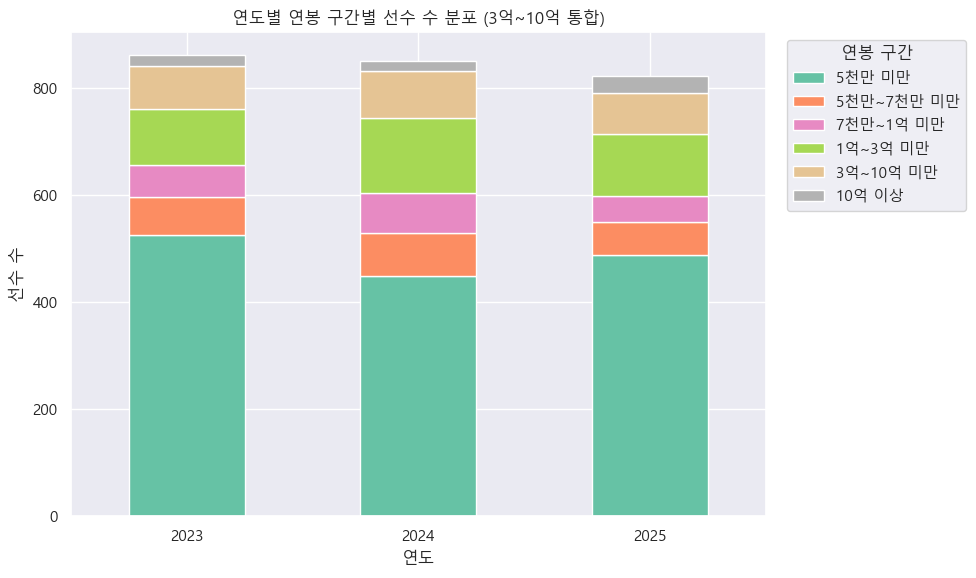

In [55]:
# 1. 연봉 구간 설정
bins = [0, 5000, 7000, 10000, 30000, 100000, float('inf')]
labels = [
    '5천만 미만', '5천만~7천만 미만', '7천만~1억 미만',
    '1억~3억 미만', '3억~10억 미만', '10억 이상'
]

# 2. 연봉구간 컬럼 생성
sal_data_final['연봉구간'] = pd.cut(sal_data_final['연봉(만원)'], bins=bins, labels=labels, right=False)

# 3. 연도 × 연봉구간별 집계
year_bin_df = sal_data_final.groupby(['연도', '연봉구간']).size().unstack(fill_value=0)

# 4. 시각화
year_bin_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('연도별 연봉 구간별 선수 수 분포 (3억~10억 통합)')
plt.xlabel('연도')
plt.ylabel('선수 수')
plt.xticks(rotation=0)
plt.legend(title='연봉 구간', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

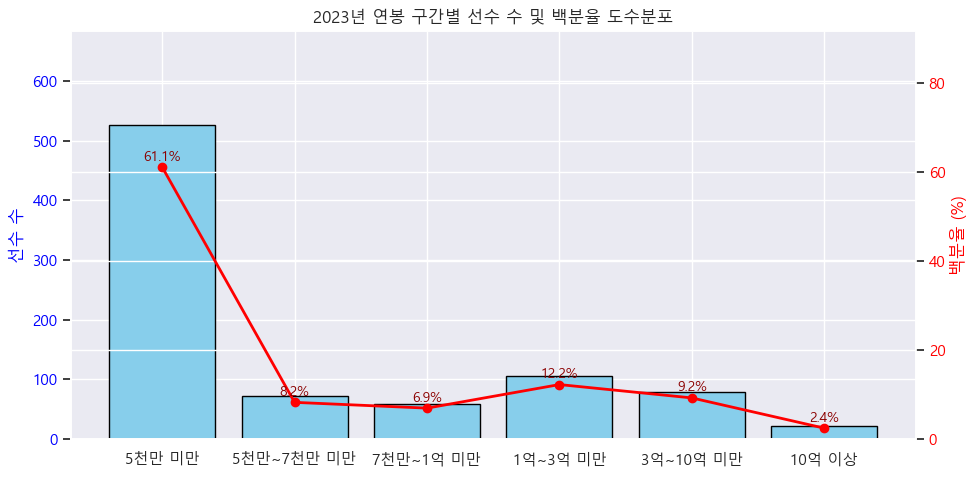

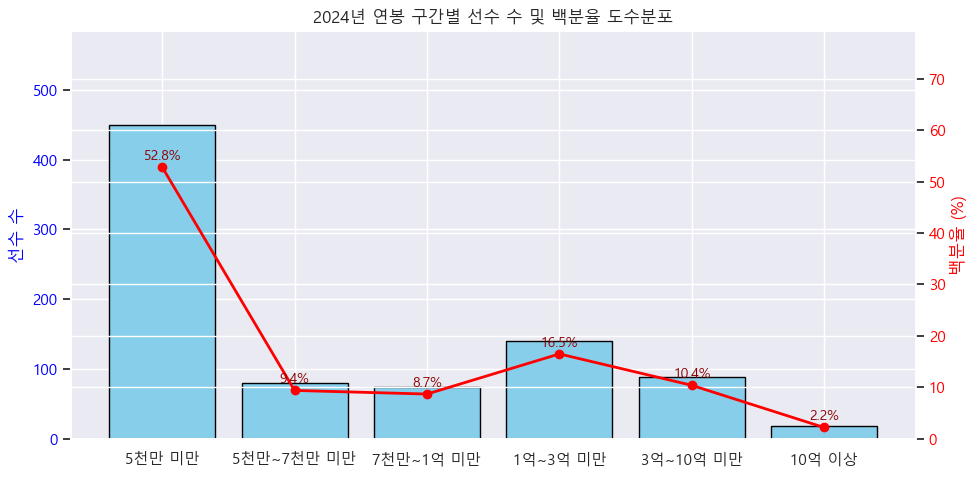

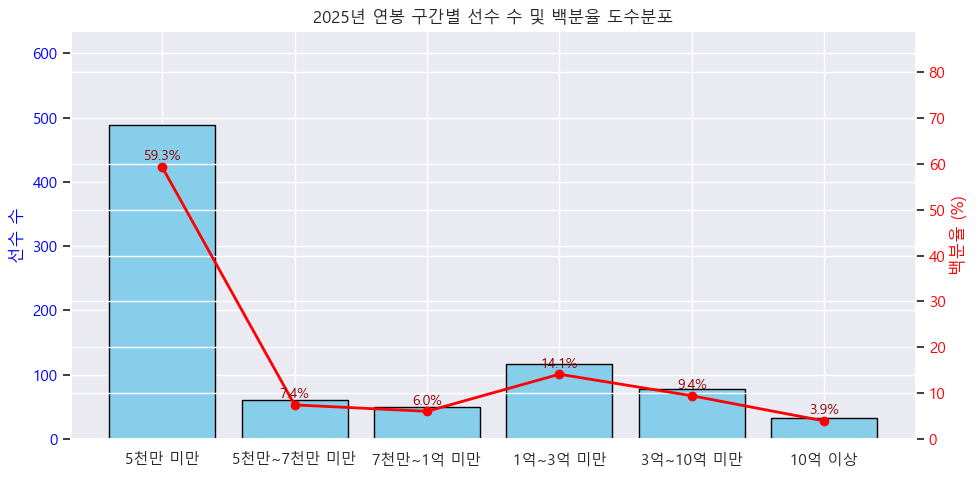

In [57]:
# 1. 연봉 구간 정의 (기존 그대로)
bins = [0, 5000, 7000, 10000, 30000, 100000, float('inf')]
labels = [
    '5천만 미만', '5천만~7천만 미만', '7천만~1억 미만',
    '1억~3억 미만', '3억~10억 미만', '10억 이상'
]

# 2. 연봉구간 생성
sal_data_final['연봉구간'] = pd.cut(sal_data_final['연봉(만원)'], bins=bins, labels=labels, right=False)

# 3. 연도 리스트
years = sorted(sal_data_final['연도'].unique())

# 4. 연도별 그래프 생성
for year in years:
    df_year = sal_data_final[sal_data_final['연도'] == year]
    
    counts = df_year['연봉구간'].value_counts().sort_index()
    percents = (counts / counts.sum() * 100).round(1)

    fig, ax1 = plt.subplots(figsize=(10, 5))

    # 막대 그래프 (도수)
    bars = ax1.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
    ax1.set_ylabel('선수 수', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_ylim(0, max(counts.values) * 1.3)

    # 선 그래프 (백분율)
    ax2 = ax1.twinx()
    ax2.plot(counts.index, percents.values, color='red', marker='o', linewidth=2)
    ax2.set_ylabel('백분율 (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, max(percents.values) * 1.5)

    # 백분율 텍스트 라벨 표시
    for i, (x, y) in enumerate(zip(counts.index, percents.values)):
        ax2.text(i, y + 0.8, f'{y}%', ha='center', va='bottom', fontsize=10, color='darkred')

    # 제목 & x축 설정
    plt.title(f'{year}년 연봉 구간별 선수 수 및 백분율 도수분포')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

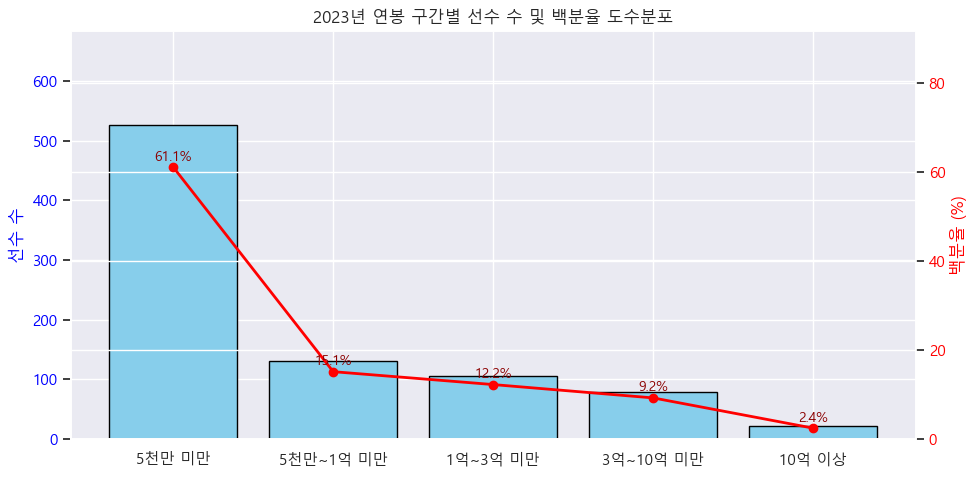

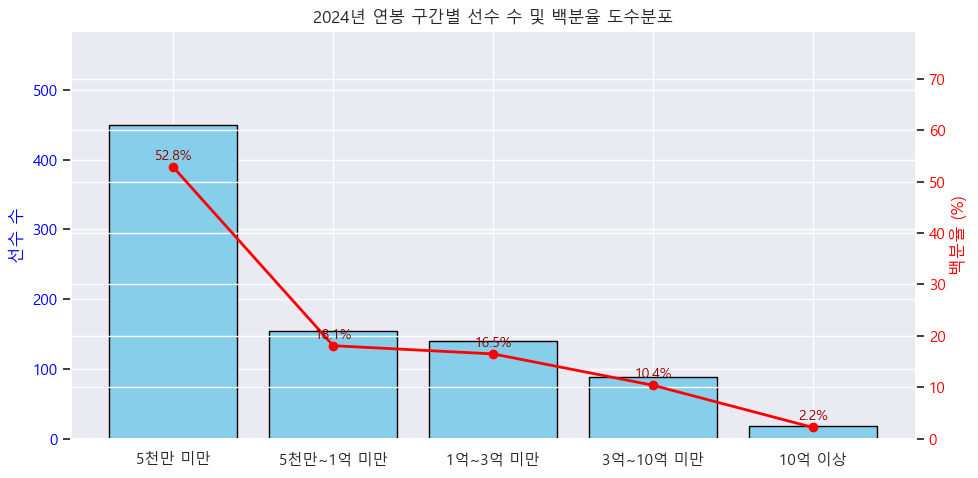

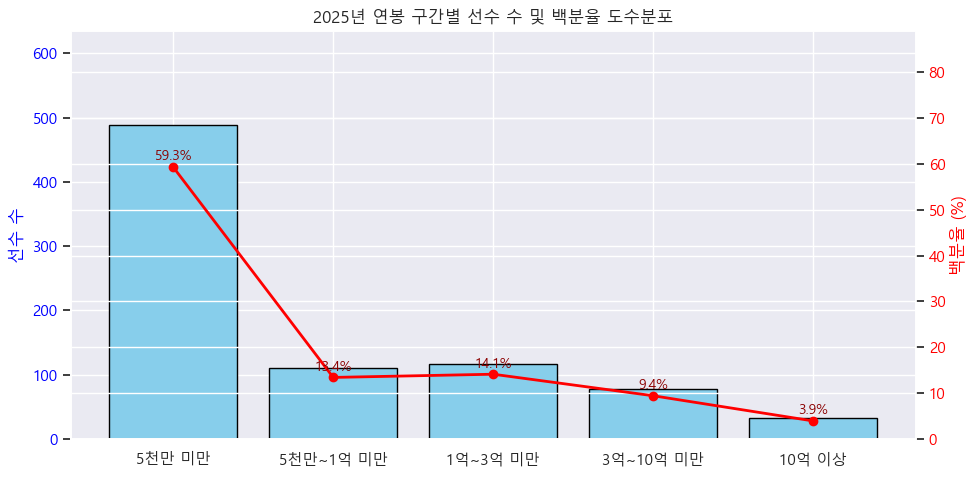

In [61]:
# 1. 연봉 구간 정의 (기존 그대로)
bins = [0, 5000, 10000, 30000, 100000, float('inf')]
labels = [
    '5천만 미만', '5천만~1억 미만',
    '1억~3억 미만', '3억~10억 미만', '10억 이상'
]

# 2. 연봉구간 생성
sal_data_final['연봉구간'] = pd.cut(sal_data_final['연봉(만원)'], bins=bins, labels=labels, right=False)

# 3. 연도 리스트
years = sorted(sal_data_final['연도'].unique())

# 4. 연도별 그래프 생성
for year in years:
    df_year = sal_data_final[sal_data_final['연도'] == year]
    
    counts = df_year['연봉구간'].value_counts().sort_index()
    percents = (counts / counts.sum() * 100).round(1)

    fig, ax1 = plt.subplots(figsize=(10, 5))

    # 막대 그래프 (도수)
    bars = ax1.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
    ax1.set_ylabel('선수 수', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_ylim(0, max(counts.values) * 1.3)

    # 선 그래프 (백분율)
    ax2 = ax1.twinx()
    ax2.plot(counts.index, percents.values, color='red', marker='o', linewidth=2)
    ax2.set_ylabel('백분율 (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, max(percents.values) * 1.5)

    # 백분율 텍스트 라벨 표시
    for i, (x, y) in enumerate(zip(counts.index, percents.values)):
        ax2.text(i, y + 0.8, f'{y}%', ha='center', va='bottom', fontsize=10, color='darkred')

    # 제목 & x축 설정
    plt.title(f'{year}년 연봉 구간별 선수 수 및 백분율 도수분포')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

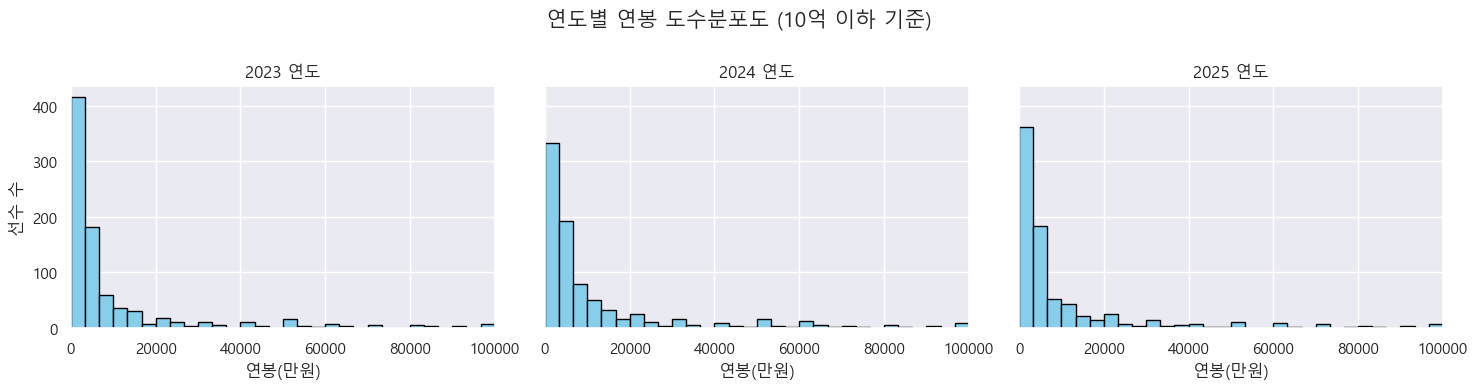

In [15]:
xlim_max = 100000  # 10억 = 100,000만원

years = sorted(sal_data_final['연도'].unique())

# ① 히스토그램
fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(5*len(years), 4), sharey=True)
for i, year in enumerate(years):
    data = sal_data_final[sal_data_final['연도'] == year]
    axes[i].hist(data['연봉(만원)'], bins=30, range=(0, xlim_max), color='skyblue', edgecolor='black')
    axes[i].set_title(f"{year} 연도")
    axes[i].set_xlim(0, xlim_max)
    axes[i].set_xlabel("연봉(만원)")
    if i == 0:
        axes[i].set_ylabel("선수 수")
fig.suptitle("연도별 연봉 도수분포도 (10억 이하 기준)", fontsize=15)
plt.tight_layout()
plt.show()

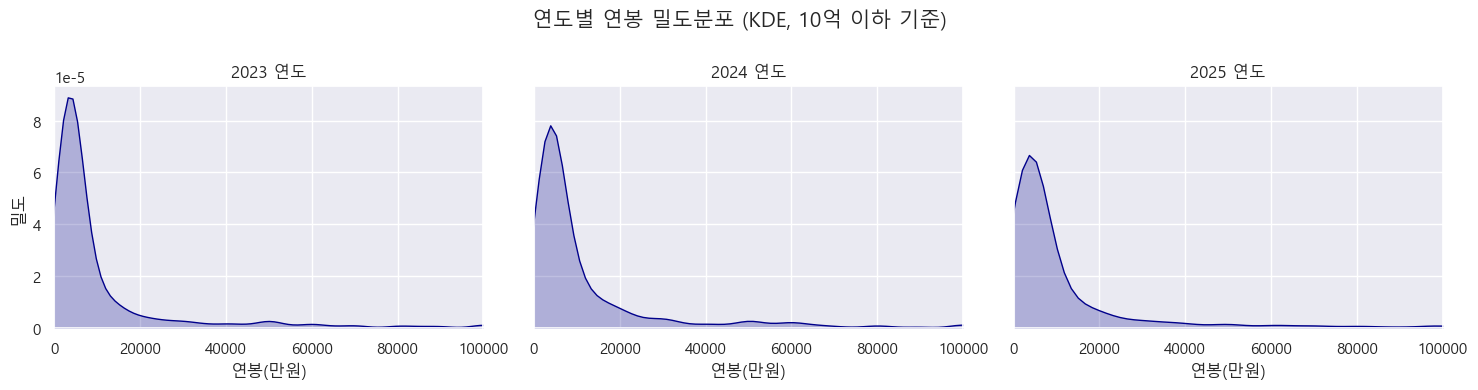

In [16]:
# ② KDE
fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(5*len(years), 4), sharey=True)
for i, year in enumerate(years):
    data = sal_data_final[sal_data_final['연도'] == year]
    sns.kdeplot(data['연봉(만원)'], fill=True, bw_adjust=0.5, ax=axes[i], color='darkblue')
    axes[i].set_title(f"{year} 연도")
    axes[i].set_xlim(0, xlim_max)
    axes[i].set_xlabel("연봉(만원)")
    if i == 0:
        axes[i].set_ylabel("밀도")
fig.suptitle("연도별 연봉 밀도분포 (KDE, 10억 이하 기준)", fontsize=15)
plt.tight_layout()
plt.show()